# Visual Q&A Demo

## Setup
1-Installs required packages   
2-Downloads sample data and a pretrained model.     

In [3]:
using Pkg; Pkg.activate("."); Pkg.instantiate(); #install required packages
include("demosetup.jl") 
include("src/main.jl")

  Updating registry at `~/.julia/registries/General`


┌ Warning: Some registries failed to update:
│     — `~/.julia/registries/General` — registry dirty
└ @ Pkg.API /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Pkg/src/API.jl:157


Demo setup is completed


scalepixel (generic function with 1 method)

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
    * w2i : words to one-hot index   : w2i["cube"] = 30  
    * a2i : answer to one-hot index  : a2i["gray"] = 8
    * i2w : one-hot index to words   : i2w[2] = "Are"   
    * i2a : one-hot index to answers : i2a[5] = "large"   
2-Loads the pretrained model, and its hyper-parameters `o`.     

In [4]:
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,Mrun,o = loadmodel("models/macnet.jld2";onlywrun=true);
global atype = typeof(params(Mrun)[1].value) <: Array ? Array{Float32} : KnetArray{Float32}

Loading demo features ...
Loading demo questions ...
Loading dictionaries ...


Array{Float32,N} where N

## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [15]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = atype(feats[:,:,:,rnd:rnd])
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction,interoutputs = singlerun(Mrun,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
interoutputs = first.(interoutputs)
answer==prediction[1]

true

In [16]:
(interoutputs,prediction[1])

([6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 2, 2], 2)

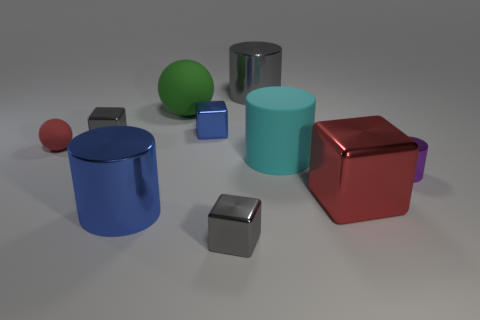

In [17]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [18]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: What number of gray shiny things are the same size as the blue metallic block ?
Answer: 2
Prediction: 2 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [19]:
userinput = readline(stdin)
words = split(userinput) # tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(Mrun,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> What number of gray shiny things are the same size as the blue metallic block ?
Question: What number of gray shiny things are the same size as the blue metallic block ?
Prediction: 2


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

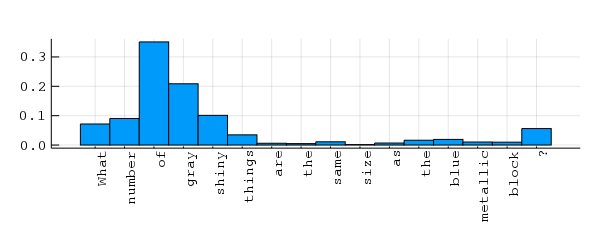

Image Attention Map: 


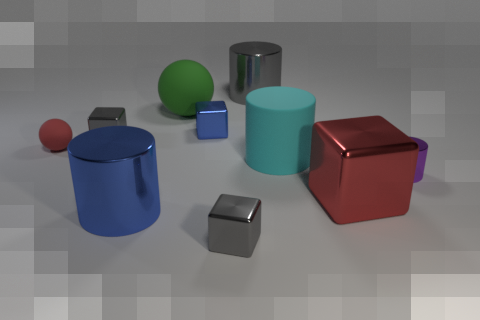

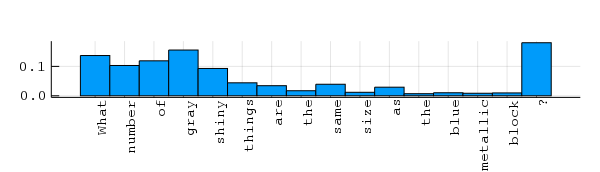

Image Attention Map: 


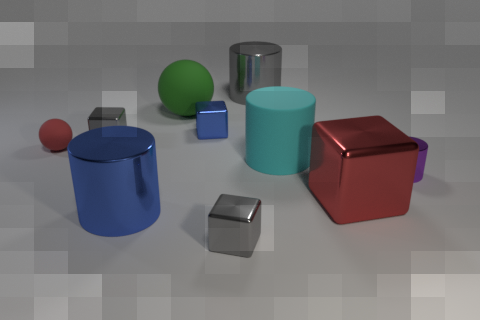

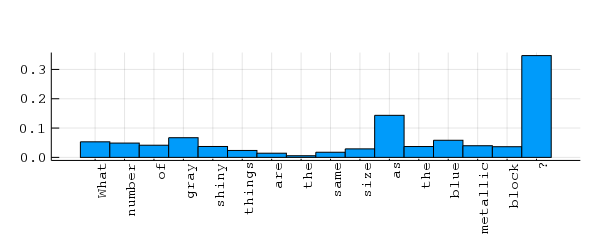

Image Attention Map: 


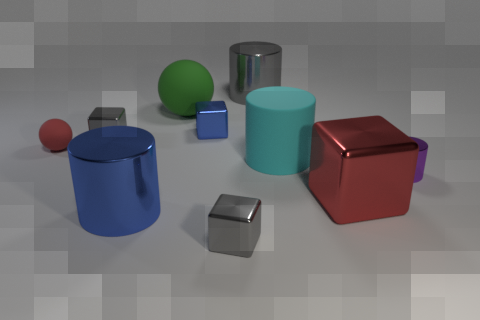

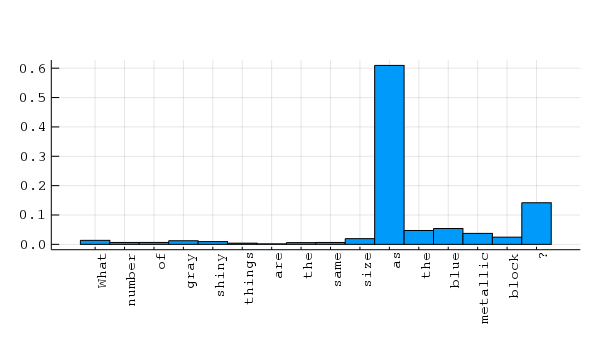

Image Attention Map: 


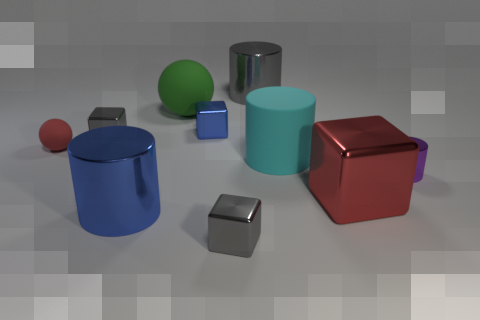

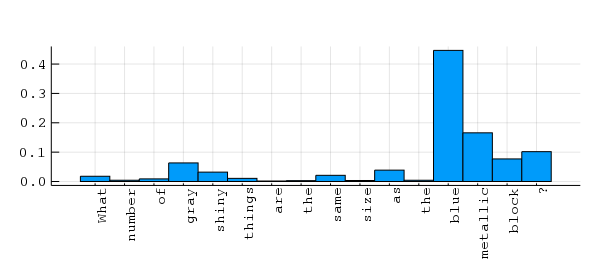

Image Attention Map: 


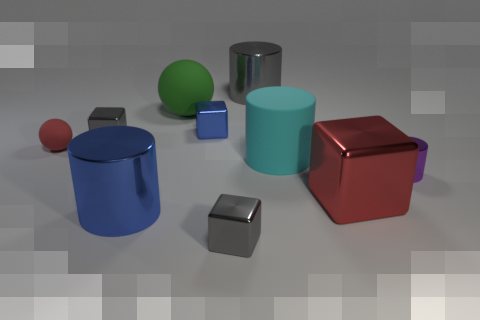

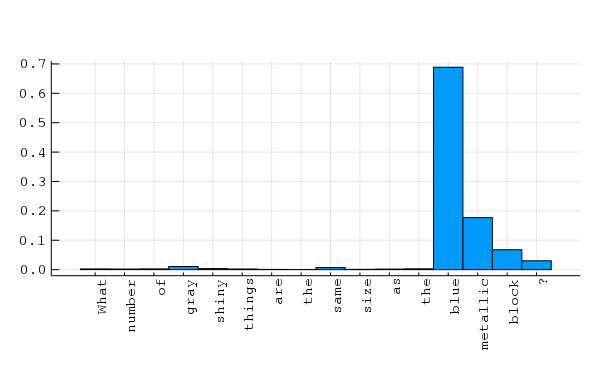

Image Attention Map: 


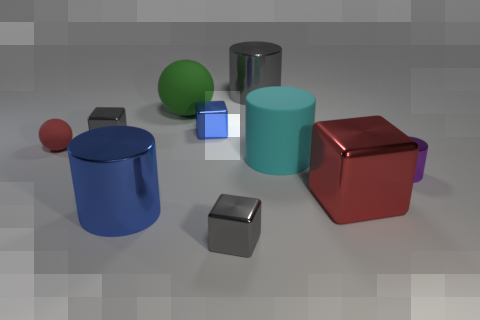

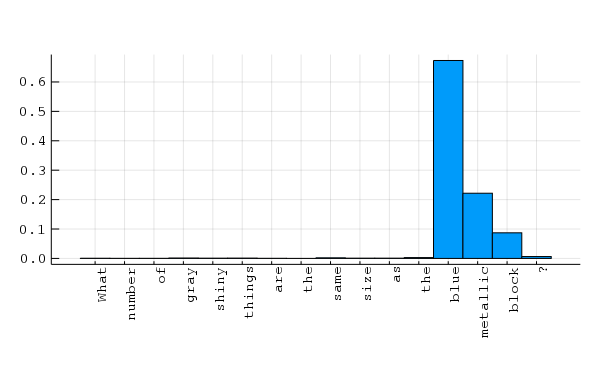

Image Attention Map: 


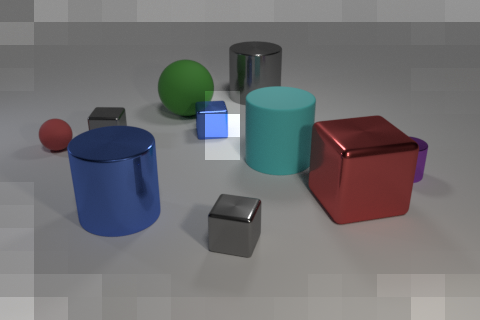

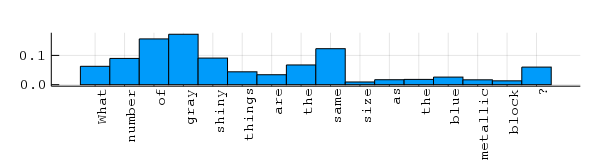

Image Attention Map: 


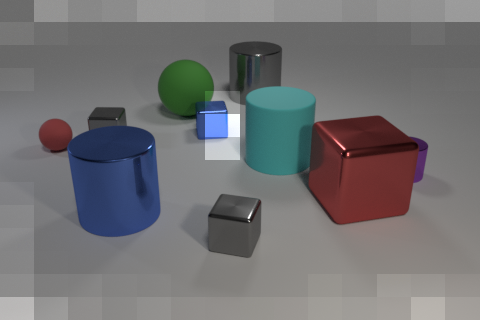

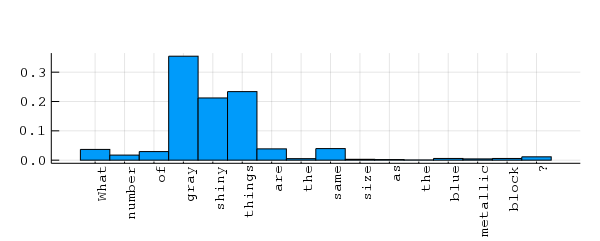

Image Attention Map: 


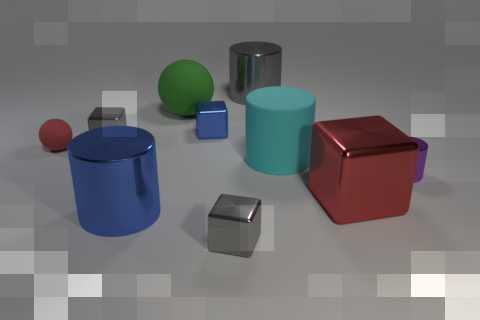

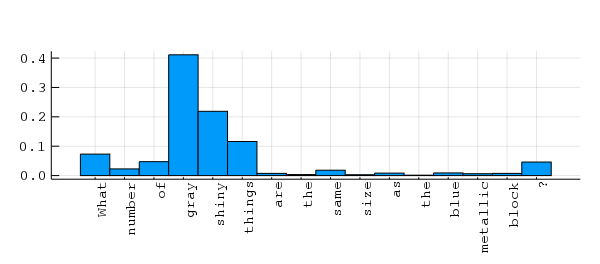

Image Attention Map: 


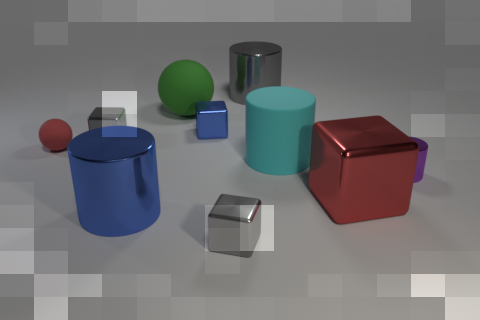

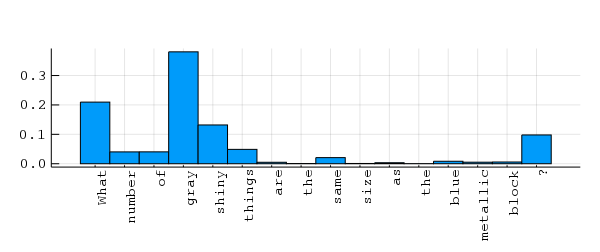

Image Attention Map: 


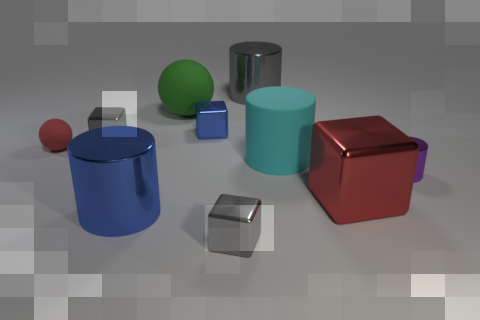

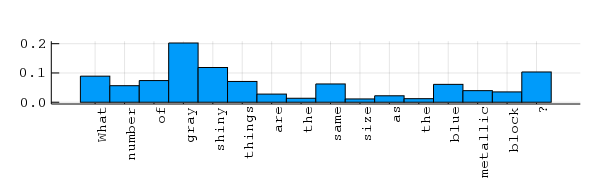

Image Attention Map: 


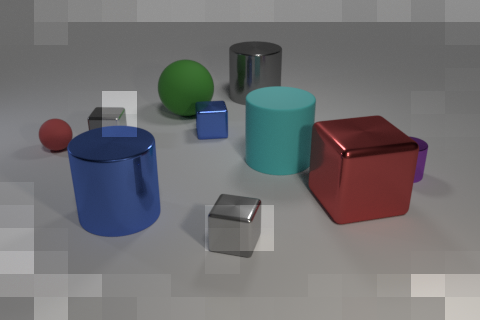

In [20]:
visualize(img,results;p=o[:p])